# Bivariate analysis on 3 numerical columns with 1 categorical columns

In [21]:
import pandas as pd

In [22]:
import seaborn as sns
sns.set_style("dark")

In [23]:
df = pd.read_csv('melbourne_housing_prices.csv', sep=',')

In [24]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


I expect there to be a difference of the amount of rooms and price per region, as richer regions will have bigger houses (with more rooms) and higher prices and vice versa.

In [25]:
df.groupby(by='Regionname').mean()

,Rooms,Price,Postcode,Propertycount,Distance
Regionname,,,,,
Eastern Metropolitan,3.436129,1.071837e+06,3123.375337,6943.980954,15.396749
Eastern Victoria,3.560284,6.893688e+05,3503.820922,9147.015957,33.749291
Northern Metropolitan,2.922591,8.237198e+05,3097.344318,9386.327275,10.583338
Northern Victoria,3.559353,6.430822e+05,3458.339928,4374.142086,33.387410
South-Eastern Metropolitan,3.281082,8.462352e+05,3222.596124,6993.424597,24.457751
Southern Metropolitan,2.984168,1.373222e+06,3157.935873,7387.549177,8.910097
Western Metropolitan,3.158658,8.005163e+05,3038.528975,6458.604421,11.337399
Western Victoria,3.260504,4.120261e+05,3337.806723,4018.415966,31.125630


There seem to be significant differences in the amount of rooms and price per region, as expected.

# Average price per region

Let's see if there are significant price differences

*Numbers are in millions (le6 = 6 zeros)*

[Text(0, 0, 'Northern Metropolitan'),
 Text(1, 0, 'Western Metropolitan'),
 Text(2, 0, 'Southern Metropolitan'),
 Text(3, 0, 'South-Eastern Metropolitan'),
 Text(4, 0, 'Eastern Metropolitan'),
 Text(5, 0, 'Northern Victoria'),
 Text(6, 0, 'Western Victoria'),
 Text(7, 0, 'Eastern Victoria')]

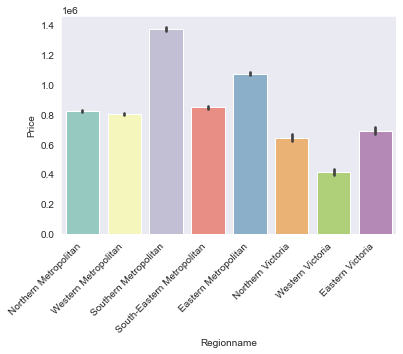

In [26]:
plot = sns.barplot(y="Price",x="Regionname",data=df)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

There are large statistically significant differences. For example, Western Victoria is 3 times less expensive than Southern Metropolitan

# Amount of average rooms per home per region

Does the higher price also mean that the homes are bigger?

In [27]:
df[['Rooms','Regionname']].groupby(by='Regionname').mean()

,Rooms
Regionname,
Eastern Metropolitan,3.436129
Eastern Victoria,3.560284
Northern Metropolitan,2.922591
Northern Victoria,3.559353
South-Eastern Metropolitan,3.281082
Southern Metropolitan,2.984168
Western Metropolitan,3.158658
Western Victoria,3.260504


It seems that there aren't significant differences and there are also to many sellers to put them in a barplot

[Text(0, 0, 'Northern Metropolitan'),
 Text(1, 0, 'Western Metropolitan'),
 Text(2, 0, 'Southern Metropolitan'),
 Text(3, 0, 'South-Eastern Metropolitan'),
 Text(4, 0, 'Eastern Metropolitan'),
 Text(5, 0, 'Northern Victoria'),
 Text(6, 0, 'Western Victoria'),
 Text(7, 0, 'Eastern Victoria')]

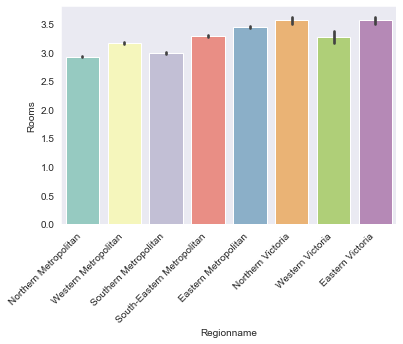

In [28]:
plot = sns.barplot(y="Rooms",x="Regionname",data=df)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

It seems that houses everywhere in Melbourne that are being sold are about the same size: 3 rooms. That's quite small. Only Victoria jumps out as having slightly larger homes with homes nearing 3.5 rooms on average.

# Amount of homes sold per region

Let's now see where most homes are being sold.

In [29]:
df[['Propertycount','Regionname']].groupby(by='Regionname').mean()

,Propertycount
Regionname,
Eastern Metropolitan,6943.980954
Eastern Victoria,9147.015957
Northern Metropolitan,9386.327275
Northern Victoria,4374.142086
South-Eastern Metropolitan,6993.424597
Southern Metropolitan,7387.549177
Western Metropolitan,6458.604421
Western Victoria,4018.415966


Seems there are large differences. Let's see in detail.

[Text(0, 0, 'Northern Metropolitan'),
 Text(1, 0, 'Western Metropolitan'),
 Text(2, 0, 'Southern Metropolitan'),
 Text(3, 0, 'South-Eastern Metropolitan'),
 Text(4, 0, 'Eastern Metropolitan'),
 Text(5, 0, 'Northern Victoria'),
 Text(6, 0, 'Western Victoria'),
 Text(7, 0, 'Eastern Victoria')]

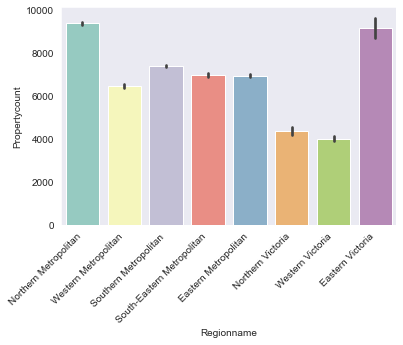

In [30]:
plot = sns.barplot(y="Propertycount",x="Regionname",data=df)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

There are indeed very large differences between regions. Eastern Victoria and Northern Metropolitan are especially hot markets.